# **CNN of Fashion MNIST Classification**

In [62]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.1.0


Import packages, Numpy, Matplotlib, Keras.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model

## **Load the Fashion MNIST Data**

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In order to train the model, as convention, we load the data and split it into training set and test set.

In [65]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('shape of x_train',x_train.shape)

shape of x_train (60000, 28, 28)


Now, let's see how the image looks like, show few examples of the data set. We identify the representation of labels from the description of the dataset.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

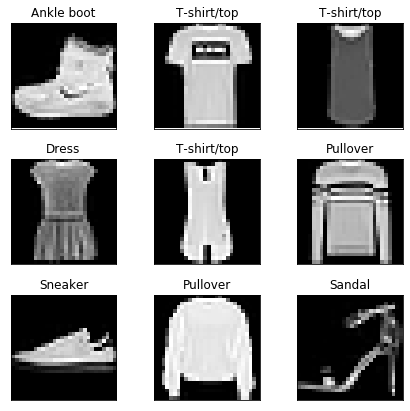

In [67]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='None')
  plt.title(class_names[y_train[i]])
  plt.xticks([])
  plt.yticks([])
plt.rcParams['figure.figsize'] = [6,6]

## **Data Pre-Processing**
This dataset is a greyscale image dataset, which means the value of each pixel is range from 0 to 255. So, most commonly, we scale the value of pixels (x_train and x_test) into range 0 to 1.
<br>
<br>
Notice that the dataset has the shape of N x Height x Width, but the convolution layer requires the shape should be N x Height x Width x color. Since we have gray scale images, we just need to expand the dimension of x_train and x_test.

In [68]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print('shape of x_train',x_train.shape)
print('shape of x_test',x_test.shape)

shape of x_train (60000, 28, 28, 1)
shape of x_test (10000, 28, 28, 1)


Determine the number of unique classes.

In [69]:
K = len(set(y_train))
print('number of unique classes: ',K)

number of unique classes:  10


## **Build the CNN Model**
Next, we will build our CNN model by using the functional API.
<br>
<br>
The model we will build has three convolution layers and follow the pattern of increasing the output feature maps at each subsequent convolution layer. The filter size is fixed as 3 x 3 with stride size 2, which means we will not follow a maxpooling layers at each convolution layer. We use relu as the activation function as usual.
<br>
<br>
After 3 convolution layers we flatten the feature images so that the input of the following dense layer is a feature vector.
<br>
<br>
Fanally, we add some dropout layers for regularization. Since we have K=10 classes, so the activation function for output layer is softmax function.

In [0]:
i = Input(x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10,activation='softmax')(x)

Then, after we have all input and output, we pass the input and output into a model constructor. The first argument of the model constructor is a list of the input or a single input, the second argument is a list of output or a single output.

In [0]:
model = Model(i,x)

Next, we compile the model with Adam as the optimization algorithm, cross entropy as the loss function and accuracy as the evaluation metric.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We train the model with training set for 15 epoch and evaluate the model using test set.

In [82]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 30s 505us/sample - loss: 0.5124 - accuracy: 0.8104 - val_loss: 0.3790 - val_accuracy: 0.8602
Epoch 2/15
60000/60000 [==============================] - 29s 488us/sample - loss: 0.3536 - accuracy: 0.8661 - val_loss: 0.3337 - val_accuracy: 0.8761
Epoch 3/15
60000/60000 [==============================] - 31s 513us/sample - loss: 0.3053 - accuracy: 0.8837 - val_loss: 0.3181 - val_accuracy: 0.8808
Epoch 4/15
60000/60000 [==============================] - 31s 520us/sample - loss: 0.2724 - accuracy: 0.8965 - val_loss: 0.2965 - val_accuracy: 0.8902
Epoch 5/15
60000/60000 [==============================] - 30s 500us/sample - loss: 0.2508 - accuracy: 0.9050 - val_loss: 0.3031 - val_accuracy: 0.8925
Epoch 6/15
60000/60000 [==============================] - 30s 499us/sample - loss: 0.2304 - accuracy: 0.9131 - val_loss: 0.2937 - val_accuracy: 0.8952
Epoch 7/15
60000/60000 [====================

We can see that the accuracy for validation data (test set) is 90%, accuracy of training set is 95%. They which means the model is a little overfitting, it means we have too many parameters, to solve this problem, we can use less number of filters (less feature maps), or reduce the output neurons before last layer.

In [87]:
i = Input(x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10,activation='softmax')(x)

model = Model(i,x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 25s 418us/sample - loss: 0.5487 - accuracy: 0.7982 - val_loss: 0.4006 - val_accuracy: 0.8480
Epoch 2/15
60000/60000 [==============================] - 25s 414us/sample - loss: 0.3799 - accuracy: 0.8580 - val_loss: 0.3499 - val_accuracy: 0.8718
Epoch 3/15
60000/60000 [==============================] - 25s 414us/sample - loss: 0.3284 - accuracy: 0.8769 - val_loss: 0.3269 - val_accuracy: 0.8785
Epoch 4/15
60000/60000 [==============================] - 26s 428us/sample - loss: 0.2984 - accuracy: 0.8880 - val_loss: 0.3119 - val_accuracy: 0.8823
Epoch 5/15
60000/60000 [==============================] - 26s 430us/sample - loss: 0.2715 - accuracy: 0.8985 - val_loss: 0.3128 - val_accuracy: 0.8860
Epoch 6/15
60000/60000 [==============================] - 25s 420us/sample - loss: 0.2520 - accuracy: 0.9054 - val_loss: 0.3021 - val_accuracy: 0.8882
Epoch 7/15
60000/60000 [====================

Another way to prevent overfitting with no more training data is increase the dropout rate or add L1 or L2 regularization term. Let's try to increase the dropout rate.

In [105]:
i = Input(x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10,activation='softmax')(x)

model2 = Model(i,x)

opt = tf.keras.optimizers.Adam(0.001)
model2.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r2 = model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 32s 531us/sample - loss: 0.5506 - accuracy: 0.7985 - val_loss: 0.3979 - val_accuracy: 0.8511
Epoch 2/15
60000/60000 [==============================] - 32s 529us/sample - loss: 0.3821 - accuracy: 0.8579 - val_loss: 0.3558 - val_accuracy: 0.8672
Epoch 3/15
60000/60000 [==============================] - 31s 518us/sample - loss: 0.3315 - accuracy: 0.8754 - val_loss: 0.3288 - val_accuracy: 0.8765
Epoch 4/15
60000/60000 [==============================] - 31s 518us/sample - loss: 0.2998 - accuracy: 0.8881 - val_loss: 0.2962 - val_accuracy: 0.8937
Epoch 5/15
60000/60000 [==============================] - 31s 521us/sample - loss: 0.2762 - accuracy: 0.8970 - val_loss: 0.3135 - val_accuracy: 0.8821
Epoch 6/15
60000/60000 [==============================] - 32s 537us/sample - loss: 0.2575 - accuracy: 0.9035 - val_loss: 0.2922 - val_accuracy: 0.8945
Epoch 7/15
60000/60000 [====================

It looks like both methods work, the accuracy of training set reduced, but the accuracy of test set remains the same. With more epoches or more dense layers, I believe the accuracy of test set will increase. Now, let's plot the loss and accuracy.

Text(0, 0.5, 'loss')

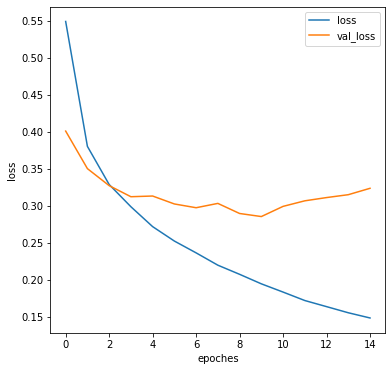

In [114]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('epoches')
plt.ylabel('loss')

We also can see that there is overfitting from the loss, since the validation loss goes up after 9 epoches.
<br>
Next, we plot the accuracy per iteration.

Text(0, 0.5, 'accuracy')

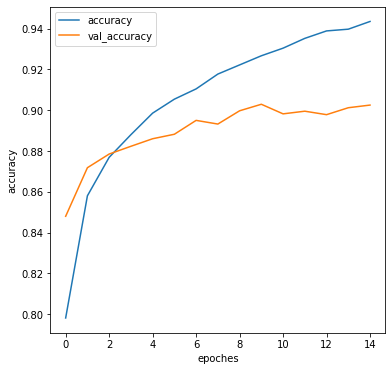

In [115]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.xlabel('epoches')
plt.ylabel('accuracy')

## **Evaluation**
In order to look into the detail we can generate a confusion matrix.

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

We predict the result using test data, input the data into the model we just trained.

In [0]:
y_pred = model.predict(x_test).argmax(axis=1)

Since the prediction results for each sample is an numpy array of probabilities,we just pick the one with the largest probability, its index as the predicted label.

Confusion matrix, without normalization
[[856   2  29  12   2   2  88   0   9   0]
 [  5 977   1  11   3   0   2   0   1   0]
 [ 14   0 837  13  62   0  69   0   5   0]
 [ 11   3  22 901  29   1  27   0   6   0]
 [  1   2  48  25 829   0  91   0   4   0]
 [  0   0   0   3   0 977   0  12   0   8]
 [114   0  51  14  67   0 741   0  13   0]
 [  0   0   0   0   0  15   0 964   0  21]
 [  2   0   3   4   5   0   4   1 980   1]
 [  1   0   0   0   0   5   0  31   0 963]]


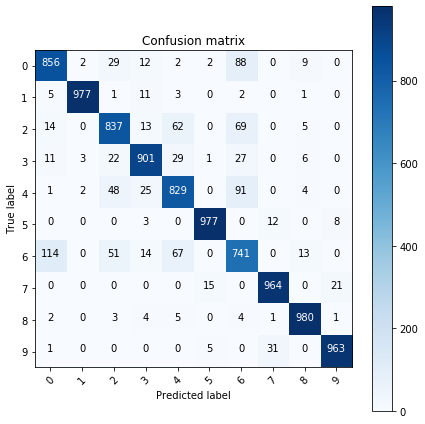

In [118]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes=list(range(10)))

From the confusion matrix we can see the most misclassified labels are true label 6 with predicted label 0, and true label 4 with predicted label 6. Recall that the label 0 is T-shirt/top, label 6 is Shirt, label 4 is Coat, which make sense, since they are very similar.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's see few correctly and incorrectly classified examples.

In [0]:
misclassified_idx = np.where(y_pred != y_test)[0]
correctclassified_idx = np.where(y_pred == y_test)[0]

In [122]:
misclassified_idx.shape

(975,)

In [0]:
i_incorct = np.random.choice(misclassified_idx,(1,5))[0]
i_corct = np.random.choice(correctclassified_idx,(1,5))[0]

In [129]:
i_incorct

array([6566, 6103, 1064, 5334, 9281])

The images that are correctly classified.

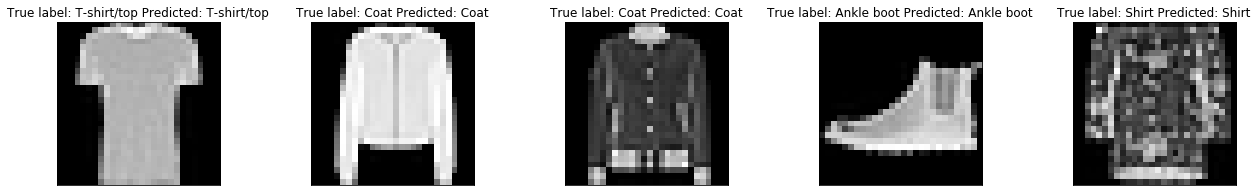

In [133]:
fig_corct = plt.figure()

for i,correct in enumerate(i_corct):
  plt.subplot(1,5,i+1)
  plt.imshow(x_test[correct].reshape(28,28),cmap='gray',interpolation='None')
  plt.title("True label: {} Predicted: {}".format(class_names[y_test[correct]],class_names[y_pred[correct]]))
  plt.xticks([])
  plt.yticks([])
plt.rcParams['figure.figsize'] = (22,3)

The images that are incorrectly classified.

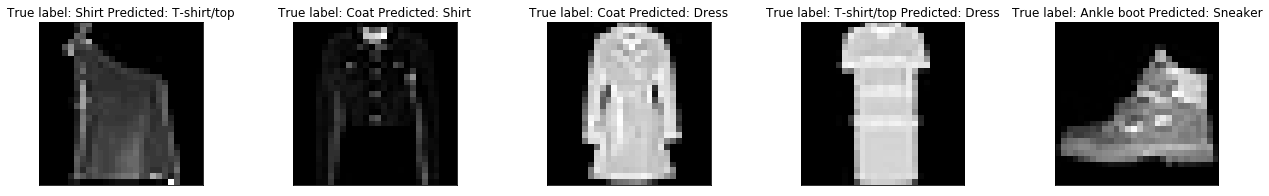

In [136]:
fig_incorct = plt.figure()

for i,incorrect in enumerate(i_incorct):
  plt.subplot(1,5,i+1)
  plt.imshow(x_test[incorrect].reshape(28,28),cmap='gray',interpolation='None')
  plt.title("True label: {} Predicted: {}".format(class_names[y_test[incorrect]],class_names[y_pred[incorrect]]))
  plt.xticks([])
  plt.yticks([])
plt.rcParams['figure.figsize'] = (22,3)

In summary, our model is good, it has 90% accuarcy on test set. We looked into the confusion matrix and find out that our model is most likely to misclassify a Shirt as a T-shirt/top and misclassify a Coat as a Shirt. Next, we also have showed some examples for correctly classified and incorrectly classified images, for some of those in correctly classified images, it is reasonable to make a mistake on classification.

## **Reference**
1. https://www.tensorflow.org/tutorials/keras/classification
2. https://www.tensorflow.org/tutorials/images/cnn
3. Udemy Tensorflow 2.0: Deep Learning and Artificial Intelligence